In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.linalg import block_diag

from one_particle import *
from util import *
from simple_qw import SimpleQW
from potential_builders import get_simple_V0, get_step_V, get_smeared_V

In [2]:
EPS = 1e-9

In [1]:
def get_ck(psi, sign):
    ck = []
    for n in range(-L, L):
        psi_k = normalize(qw.free_eigenfun(sign=sign, k=np.pi/L*n))
        ck.append(psi.T.conj() @ psi_k)
    return np.array(ck)
    
def decompose_in_k(psi, k0):
    ck_plus = get_ck(psi, sign=1)
    ck_minus = get_ck(psi, sign=-1)
    norm = sum(np.abs(ck_plus)**2) + sum(np.abs(ck_minus)**2)
    assert abs(norm-1) < 1e-3, norm
    plt.xlabel('k')
    plt.ylabel(r'$\vert{c_k}\vert^2$')
    plt.title('Mode decomposition')
    plt.xticks([k0, k0-np.pi, -k0, -k0+np.pi], [r'$k_0$', r'$k_0-\pi$', r'$-k_0$', r'$\pi-k_0$'])
    p = plt.plot(np.arange(-L, L)*np.pi/L, np.abs(ck_plus)**2+np.abs(ck_minus)**2)
    return p

# Step Potential

We consider a smeared potential that now acts for $x\in [-1, 0, 1]$ and check whether the unwanted interference pattern disappears.

Otherwise, we consider the same parameter we did for the experiment (with unreasonable resources): $L=300$, $\theta=\pi/4$, $\phi=\pi/3$, and $\gamma=3\pi/4$. We prepare an initial gaussian packet localized at $x_0=-100$ travelling to the right with momentum close to $k_0=\pi/4$ ($\sigma_k=0.1$). 

In [4]:
L = 500
dk = np.pi/L
theta = np.pi/4
phi = np.pi/3
gamma = 3*np.pi/4
vx = 10
V0 = get_simple_V0(phi, gamma)
V = get_step_V(L=L, V0=V0, a=-vx, b=vx-1)
qw = SimpleQW(L=L, theta=theta, V=V)

In [5]:
k0 = np.pi/4
sigma_k = 0.05
x0 = -400
qw.psi = normalize(qw.wave_packet(k0=k0, sigma_k=sigma_k, x0=x0, sign=1))

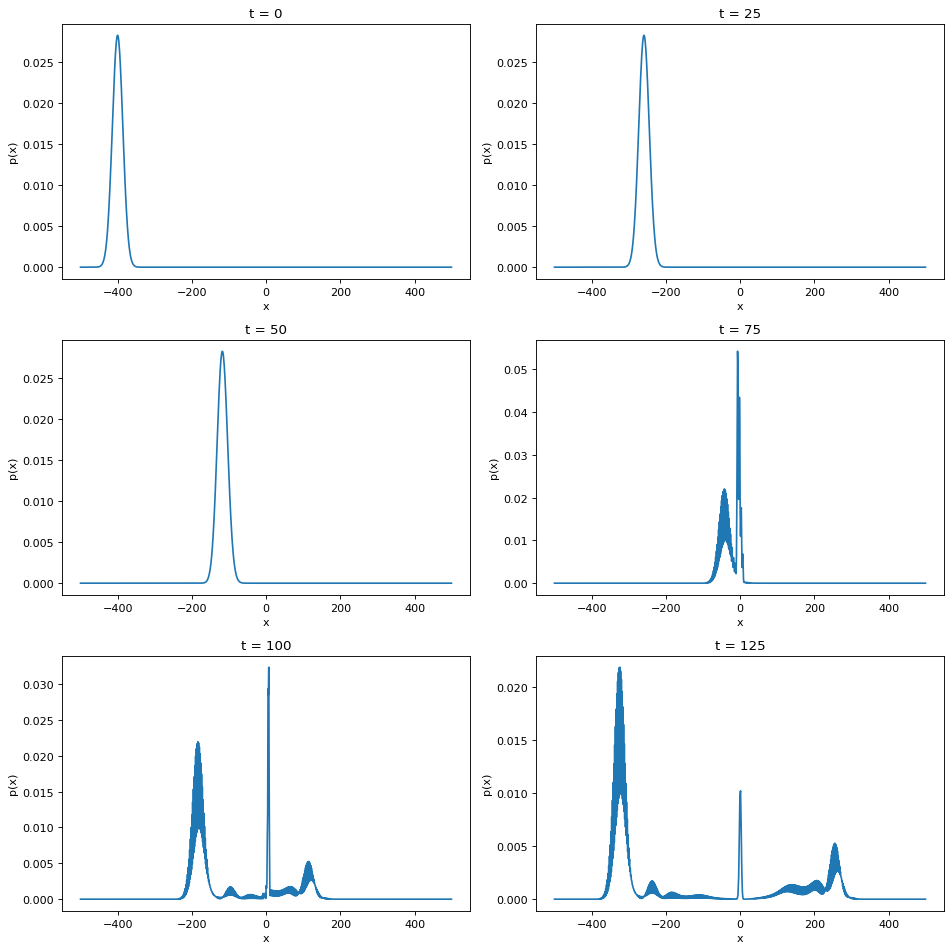

In [6]:
steps = 5
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
plot_x(qw, -L, L)
plt.title(f't = 0')
for i in range(steps):
    qw.evolve(100)
    fig.add_subplot(3, 2, i+2)
    plot_x(qw, -L, L)
    plt.title(f't = {25*(i+1)}')
fig.tight_layout()
plt.show()

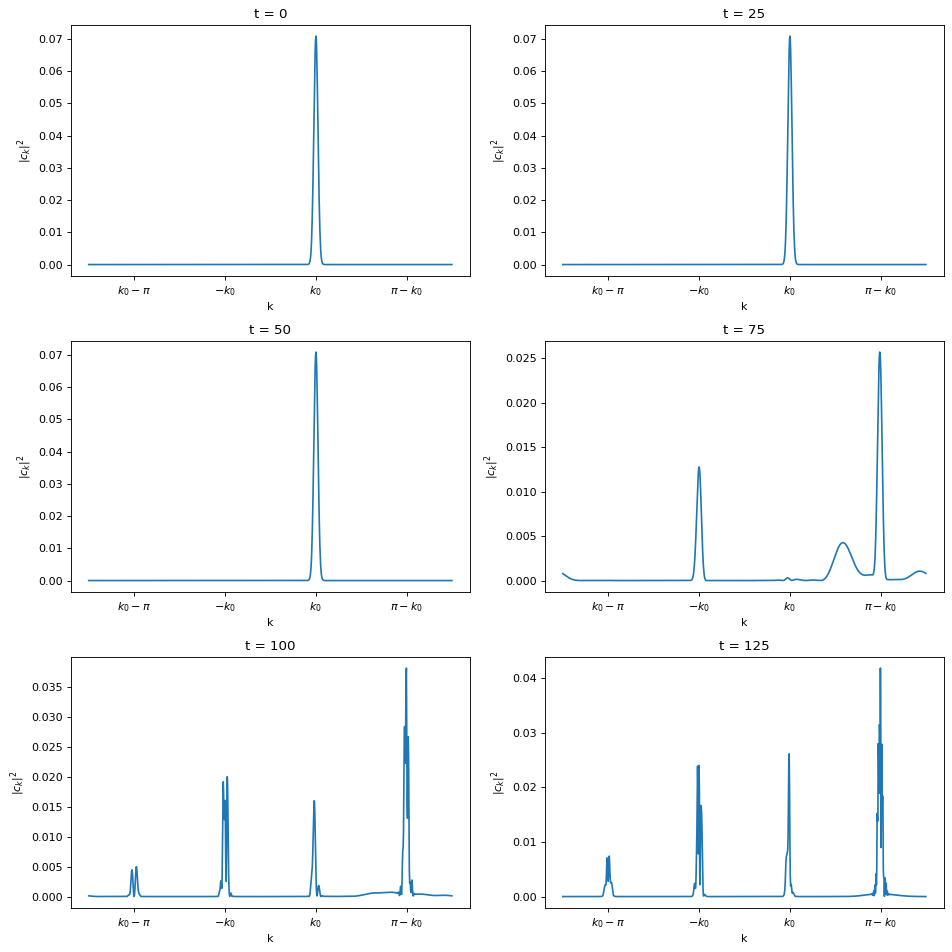

In [7]:
qw.psi = normalize(qw.wave_packet(k0=k0, sigma_k=sigma_k, x0=x0, sign=1))
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
decompose_in_k(qw.psi, k0)
plt.title(f't = 0')
steps = 5
for i in range(steps):
    qw.evolve(100)
    fig.add_subplot(3, 2, i+2)
    decompose_in_k(qw.psi, k0)
    plt.title(f't = {25*(i+1)}')
fig.tight_layout()
plt.show()

## Smeared potential

We now consider a potential which is turned off smoothly away from $x=0$. 

In [4]:
L = 500
dk = np.pi/L
theta = np.pi/4
phi = np.pi/3
gamma = 3*np.pi/4
sigma_V = 1
V = get_smeared_V(L=L, phi=phi, gamma=gamma, sigma_V=sigma_V)
qw = SimpleQW(L=L, theta=theta, V=V)

In [6]:
k0 = np.pi/4
sigma_k = 0.05
x0 = -300
qw.psi = normalize(qw.wave_packet(k0=k0, sigma_k=sigma_k, x0=x0, sign=1))

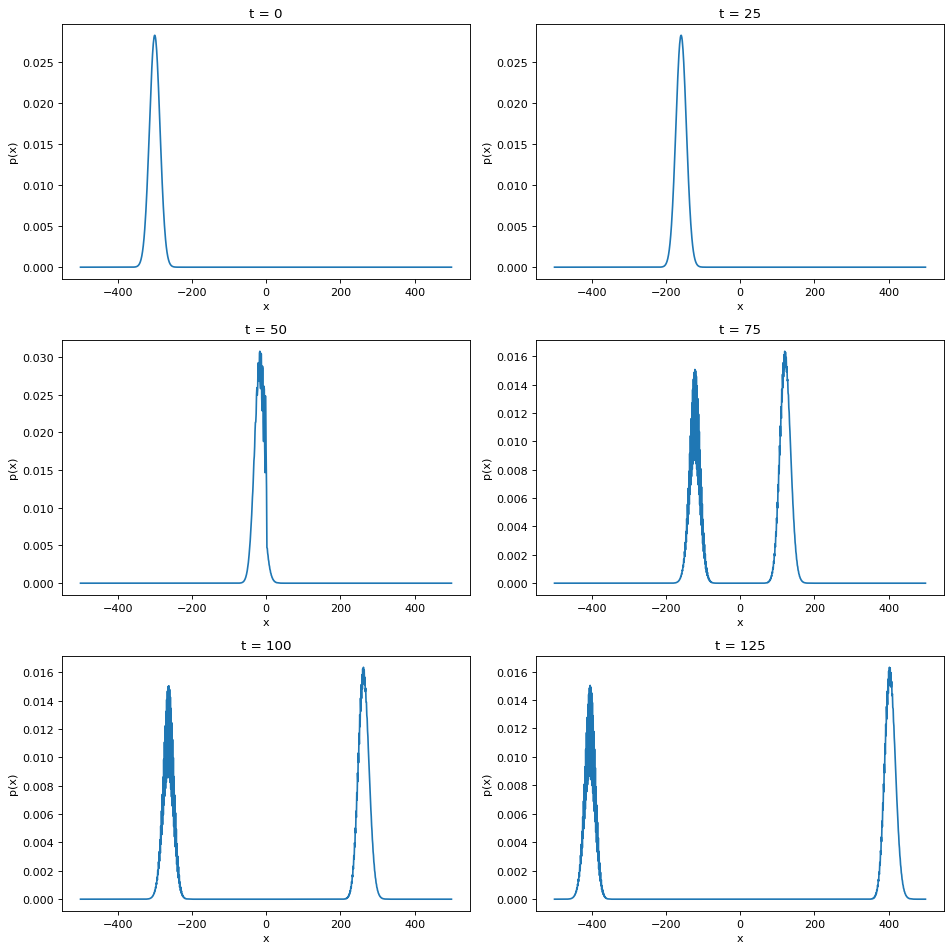

In [8]:
steps = 5
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
plot_x(qw, -L, L)
plt.title(f't = 0')
for i in range(steps):
    qw.evolve(100)
    fig.add_subplot(3, 2, i+2)
    plot_x(qw, -L, L)
    plt.title(f't = {25*(i+1)}')
fig.tight_layout()
plt.show()

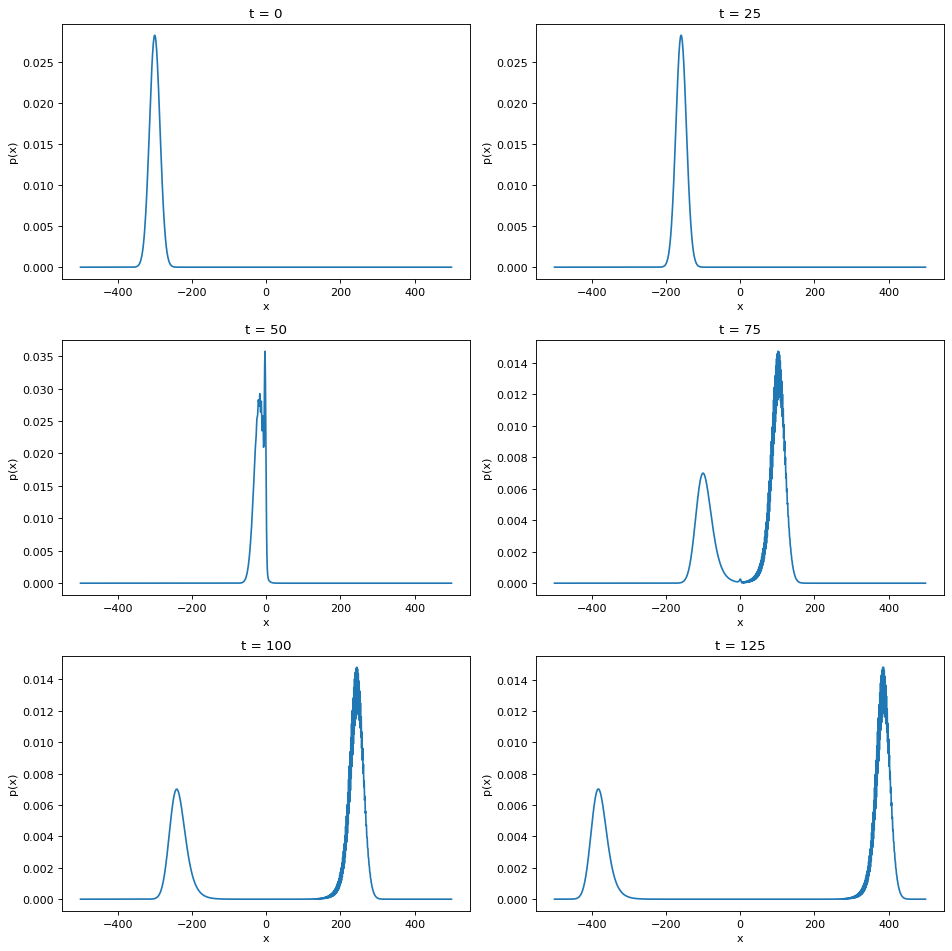

In [10]:
sigma_V = 5
V = get_smeared_V(L=L, phi=phi, gamma=gamma, sigma_V=sigma_V)
qw = SimpleQW(L=L, theta=theta, V=V)
qw.psi = normalize(qw.wave_packet(k0=k0, sigma_k=sigma_k, x0=x0, sign=1))
steps = 5
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
x_max = L
plot_x(qw, -x_max, x_max)
plt.title(f't = 0')
for i in range(steps):
    qw.evolve(100)
    fig.add_subplot(3, 2, i+2)
    plot_x(qw, -x_max, x_max)
    plt.title(f't = {25*(i+1)}')
fig.tight_layout()
plt.show()

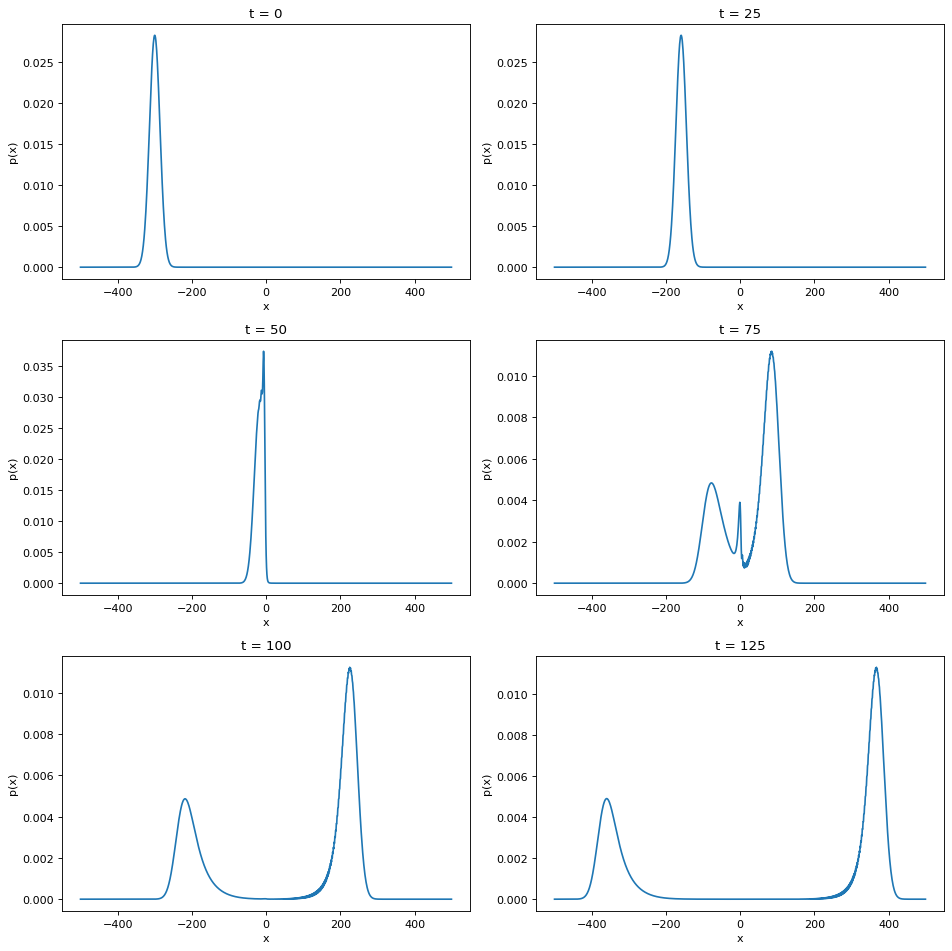

In [12]:
sigma_V = 10
V = get_smeared_V(L=L, phi=phi, gamma=gamma, sigma_V=sigma_V)
qw = SimpleQW(L=L, theta=theta, V=V)
qw.psi = normalize(qw.wave_packet(k0=k0, sigma_k=sigma_k, x0=x0, sign=1))
steps = 5
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
x_max = L
plot_x(qw, -x_max, x_max)
plt.title(f't = 0')
for i in range(steps):
    qw.evolve(100)
    fig.add_subplot(3, 2, i+2)
    plot_x(qw, -x_max, x_max)
    plt.title(f't = {25*(i+1)}')
fig.tight_layout()
plt.show()

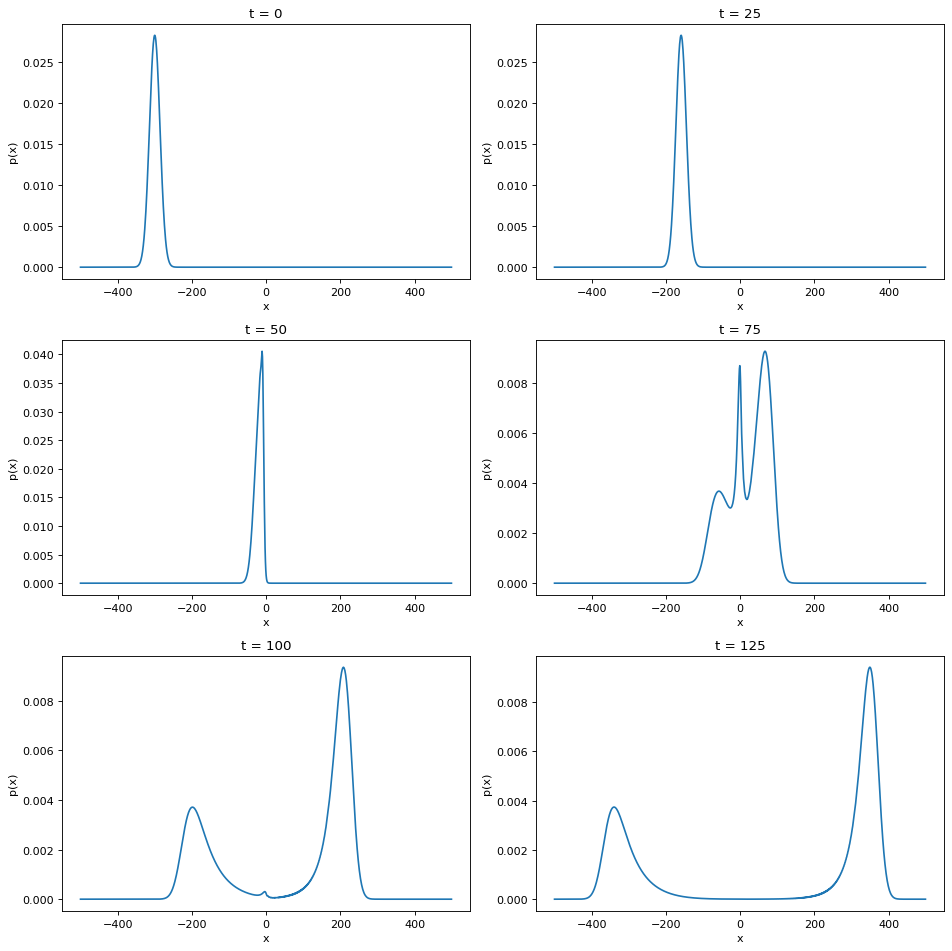

In [92]:
sigma_V = 15
qw = SimpleQW(L=L, theta=theta, phi=phi, gamma=gamma, sigma_V=sigma_V)
qw.psi = normalize(qw.wave_packet(k0=k0, sigma_k=sigma_k, x0=x0, sign=1))
steps = 5
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
x_max = L
qw.plot_x(-x_max, x_max)
plt.title(f't = 0')
for i in range(steps):
    qw.evolve(100)
    fig.add_subplot(3, 2, i+2)
    qw.plot_x(-x_max, x_max)
    plt.title(f't = {25*(i+1)}')
fig.tight_layout()
plt.show()

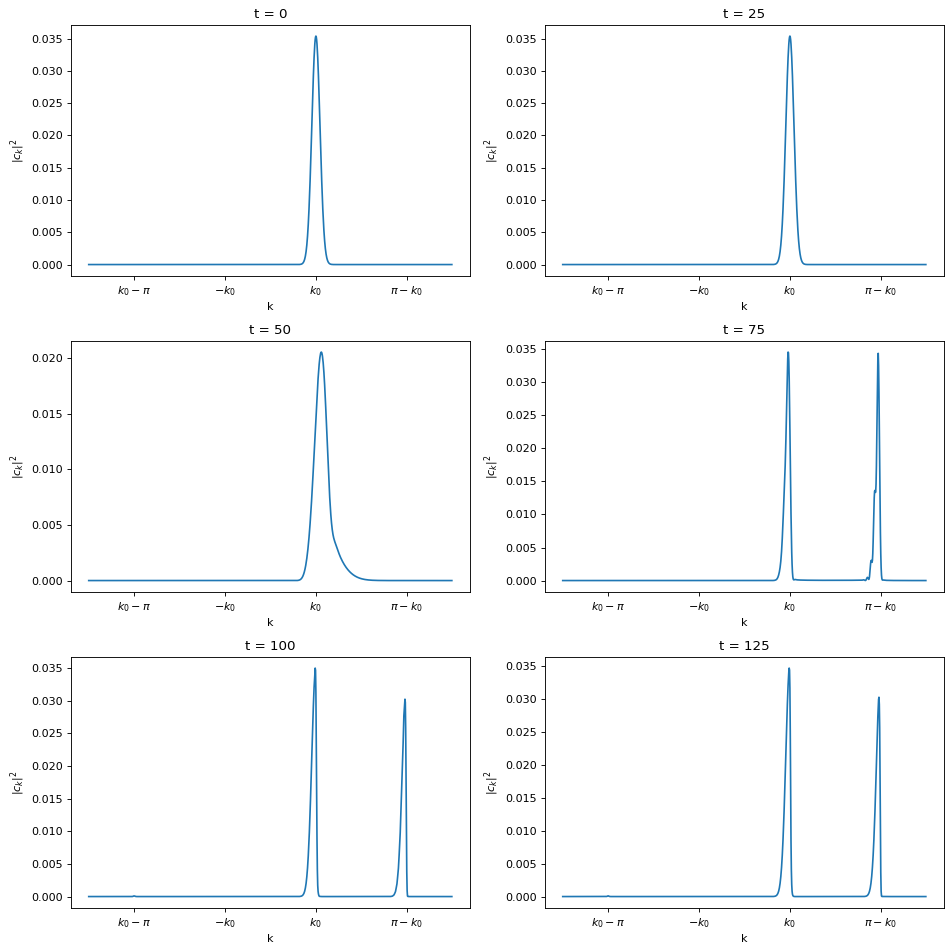

In [99]:
sigma_V = 10
qw = SimpleQW(L=L, theta=theta, phi=phi, gamma=gamma, sigma_V=sigma_V)
qw.psi = normalize(qw.wave_packet(k0=k0, sigma_k=sigma_k, x0=x0, sign=1))
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
decompose_in_k(qw.psi, k0)
plt.title(f't = 0')
steps = 5
for i in range(steps):
    qw.evolve(100)
    fig.add_subplot(3, 2, i+2)
    decompose_in_k(qw.psi, k0)
    plt.title(f't = {25*(i+1)}')
fig.tight_layout()
plt.show()